# Import

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import scipy
import nltk
import sys

# Setup


A few tiny adjustments for better code readability

In [72]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

#3 Loading Dataset

In [73]:
gendered_pronoun_df = pd.read_csv('../content/test_stage_1.tsv',  sep='\t')
gendered_pronoun_df

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera
...,...,...,...,...,...,...,...,...,...
1995,development-1996,"Faye's third husband, Paul Resnick, reported t...",her,433,Nicole,255,Faye,328,http://en.wikipedia.org/wiki/Faye_Resnick
1996,development-1997,The plot of the film focuses on the life of a ...,her,246,Doris Chu,111,Mei,215,http://en.wikipedia.org/wiki/Two_Lies
1997,development-1998,Grant played the part in Trevor Nunn's movie a...,she,348,Maria,259,Imelda Staunton,266,http://en.wikipedia.org/wiki/Sir_Andrew_Aguecheek
1998,development-1999,The fashion house specialised in hand-printed ...,She,284,Helen,145,Suzanne Bartsch,208,http://en.wikipedia.org/wiki/Helen_David


In [74]:
submission = pd.read_csv('../content/sample_submission_stage_1.csv')
submission

,ID,A,B,NEITHER
0,development-1,0.33333,0.33333,0.33333
1,development-2,0.33333,0.33333,0.33333
2,development-3,0.33333,0.33333,0.33333
3,development-4,0.33333,0.33333,0.33333
4,development-5,0.33333,0.33333,0.33333
...,...,...,...,...
1995,development-1996,0.33333,0.33333,0.33333
1996,development-1997,0.33333,0.33333,0.33333
1997,development-1998,0.33333,0.33333,0.33333
1998,development-1999,0.33333,0.33333,0.33333


In [75]:
print(gendered_pronoun_df.shape)
print(submission.shape)

(2000, 9)
(2000, 4)


# Gendered Pronoun Data set Analysis

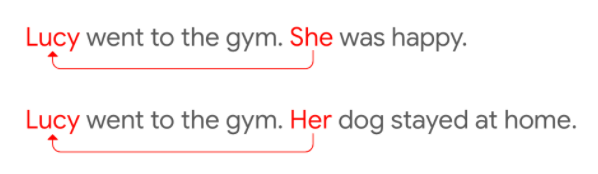

Pronoun resolution is part of coreference resolution, the task of pairing an expression to its referring entity. This is an important task for natural language understanding, and the resolution of ambiguous pronouns is a longstanding challenge. for more information you can check this [link](https://www.kaggle.com/c/gendered-pronoun-resolution)



## Problem Feature

In this case, you must identify the target of a pronoun within a text passage. The source text is taken from Wikipedia articles. You are provided with the pronoun and two candidate names to which the pronoun could refer. You must create an algorithm capable of deciding whether the pronoun refers to name A, name B, or neither.

In [76]:
gendered_pronoun_df.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera


In [77]:
gendered_pronoun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2000 non-null   object
 1   Text            2000 non-null   object
 2   Pronoun         2000 non-null   object
 3   Pronoun-offset  2000 non-null   int64 
 4   A               2000 non-null   object
 5   A-offset        2000 non-null   int64 
 6   B               2000 non-null   object
 7   B-offset        2000 non-null   int64 
 8   URL             2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 140.8+ KB


## Variables
1. ID - Unique identifier for an example (Matches to Id in output file format)
2. Text - Text containing the ambiguous pronoun and two candidate names (about a paragraph in length)
3. Pronoun - The target pronoun (text)
4. Pronoun-offset The character offset of Pronoun in Text
5. A - The first name candidate (text)
6. A-offset - The character offset of name A in Text
7. B - The second name candidate
8. B-offset - The character offset of name B in Text
9. URL - The URL of the source Wikipedia page for the example

In [78]:
gendered_pronoun_df.Text[0]

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [79]:
print(gendered_pronoun_df.Text.head())

0    Zoe Telford -- played the police officer girlf...
1    He grew up in Evanston, Illinois the second ol...
2    He had been reelected to Congress, but resigne...
3    The current members of Crime have also perform...
4    Her Santa Fe Opera debut in 2005 was as Nuria ...
Name: Text, dtype: object


## Evaluation

Submissions are evaluated using the multi-class logarithmic loss. Each pronoun has been labeled with whether it refers to A, B, or NEITHER. For each pronoun, you must submit a set of predicted probabilities (one for each class). The formula is :

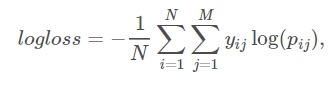





In [80]:
print("Shape of train set : ",gendered_pronoun_df.shape)

Shape of train set :  (2000, 9)


In [81]:
gendered_pronoun_df.columns

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B',
       'B-offset', 'URL'],
      dtype='object')

# Check Missing Data

I'll show 2 different ways of checking it

In [82]:
gendered_pronoun_df.apply(lambda x : sum(x.isnull()))

ID                0
Text              0
Pronoun           0
Pronoun-offset    0
A                 0
A-offset          0
B                 0
B-offset          0
URL               0
dtype: int64

In [83]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [84]:
check_missing_data(gendered_pronoun_df)

False

# Some New Features and their analysis

In this section, I will extract a few new statistical features from the text field

## Number of words in the text

In [85]:
gendered_pronoun_df["num_words"] = gendered_pronoun_df["Text"].apply(lambda x: len(str(x).split()))
gendered_pronoun_df["num_words"].head()

0     74
1     65
2     95
3     69
4    112
Name: num_words, dtype: int64

In [86]:
print('maximum of num_words in data_df',gendered_pronoun_df["num_words"].max())
print('min of num_words in data_df',gendered_pronoun_df["num_words"].min())

maximum of num_words in data_df 204
min of num_words in data_df 16


## Number of unique words in the text

In [87]:
gendered_pronoun_df["num_unique_words"] = gendered_pronoun_df["Text"].apply(lambda x: len(set(str(x).split())))
print('maximum of num_unique_words in train',gendered_pronoun_df["num_unique_words"].max())
print('mean of num_unique_words in data_df',gendered_pronoun_df["num_unique_words"].mean())

maximum of num_unique_words in train 136
mean of num_unique_words in data_df 56.4005


## Number of characters in the text

In [88]:
gendered_pronoun_df["num_chars"] = gendered_pronoun_df["Text"].apply(lambda x: len(str(x)))
print('maximum of num_chars in data_df',gendered_pronoun_df["num_chars"].max())

maximum of num_chars in data_df 1270


## Number of punctuations in the text

In [89]:
import string
gendered_pronoun_df["num_punctuations"] =gendered_pronoun_df['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
print('maximum of num_punctuations in data_df',gendered_pronoun_df["num_punctuations"].max())


maximum of num_punctuations in data_df 93


## Number of title case words in the text

In [90]:
gendered_pronoun_df["num_words_upper"] = gendered_pronoun_df["Text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
print('maximum of num_words_upper in data_df',gendered_pronoun_df["num_words_upper"].max())

maximum of num_words_upper in data_df 11


In [91]:
print(gendered_pronoun_df.columns)
gendered_pronoun_df.head(1)

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B',
       'B-offset', 'URL', 'num_words', 'num_unique_words', 'num_chars',
       'num_punctuations', 'num_words_upper'],
      dtype='object')


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,num_unique_words,num_chars,num_punctuations,num_words_upper
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,426,14,0


In [92]:
pronoun=gendered_pronoun_df["Pronoun"]

In [93]:
np.unique(pronoun)

array(['He', 'Her', 'His', 'She', 'he', 'her', 'him', 'his', 'she'],
      dtype=object)

In [94]:
binary = {
    "He": 0,
    "he": 0,
    "She": 1,
    "she": 1,
    "His": 2,
    "his": 2,
    "Him": 3,
    "him": 3,
    "Her": 4,
    "her": 4
}
for index in range(len(gendered_pronoun_df)):
    key = gendered_pronoun_df.iloc[index]['Pronoun']
    gendered_pronoun_df.at[index, 'Pronoun_binary'] = binary[key]
gendered_pronoun_df.head(30)

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,num_unique_words,num_chars,num_punctuations,num_words_upper,Pronoun_binary
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,426,14,0,4.0
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie,65,58,410,12,0,2.0
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...,95,71,536,16,0,2.0
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band),69,58,401,13,1,2.0
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera,112,80,660,18,1,1.0
5,development-6,Sandra Collins is an American DJ. She got her ...,She,411,Collins,236,DJ,347,http://en.wikipedia.org/wiki/Sandra_Collins,81,64,488,13,4,1.0
6,development-7,Reb Chaim Yaakov's wife is the sister of Rabbi...,his,273,Reb Asher,152,Akiva Eiger,253,http://en.wikipedia.org/wiki/Asher_Arieli,72,48,432,11,0,2.0
7,development-8,Slant Magazine's Sal Cinquemani viewed the alb...,his,337,Greg Kot,173,Robert Christgau,377,http://en.wikipedia.org/wiki/The_Truth_About_L...,71,60,451,21,0,2.0
8,development-9,Her father was an Englishman ``of rank and cul...,her,246,Mary Paine,255,Kelsey,267,http://en.wikipedia.org/wiki/Mary_S._Peake,53,42,302,13,0,4.0
9,development-10,Shaftesbury's UK partners in the production of...,she,329,Christina Jennings,196,Kirstine Stewart,226,http://en.wikipedia.org/wiki/Murdoch_Mysteries,52,45,381,14,4,1.0


## Visualization

## Distribution histograms of each variable

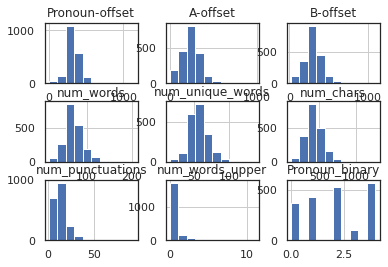

In [95]:
gendered_pronoun_df.hist();

## Scatter matrix

<Figure size 432x288 with 0 Axes>

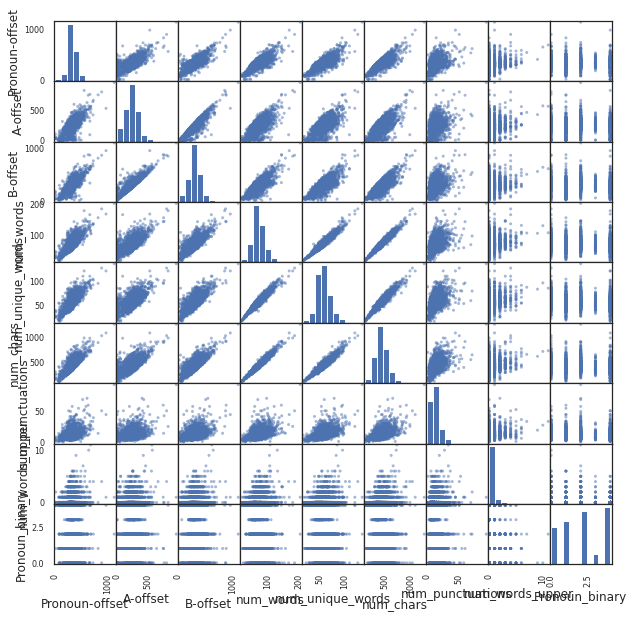

<Figure size 432x288 with 0 Axes>

In [96]:
pd.plotting.scatter_matrix(gendered_pronoun_df,figsize=(10,10))
plt.figure()

## Joinplot with Pronoun-offset and A-offset

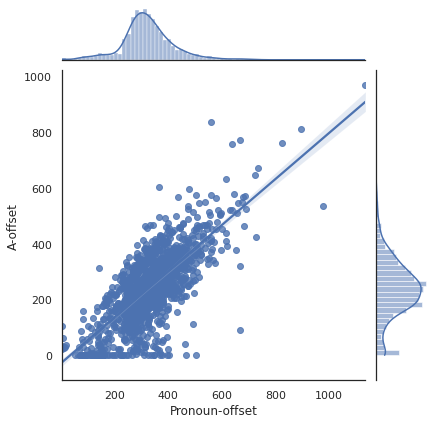

In [97]:
sns.jointplot(x='Pronoun-offset',y='A-offset' ,data=gendered_pronoun_df, kind='reg')

## Pronout-offset distribution

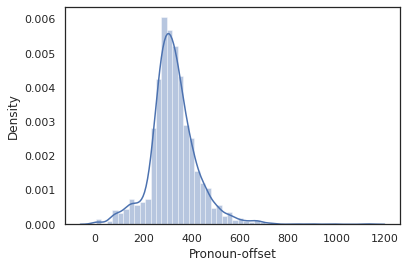

In [98]:
sns.distplot(gendered_pronoun_df["Pronoun-offset"])

## Violinplot with Pronoun-offset and A-offset

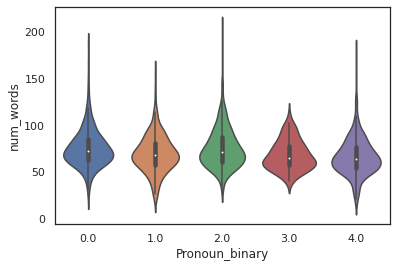

In [99]:
sns.violinplot(data=gendered_pronoun_df,x="Pronoun_binary", y="num_words")